In [1]:
require './moromoro'

true

In [2]:
(467.8 + 466.2)/2

467.0

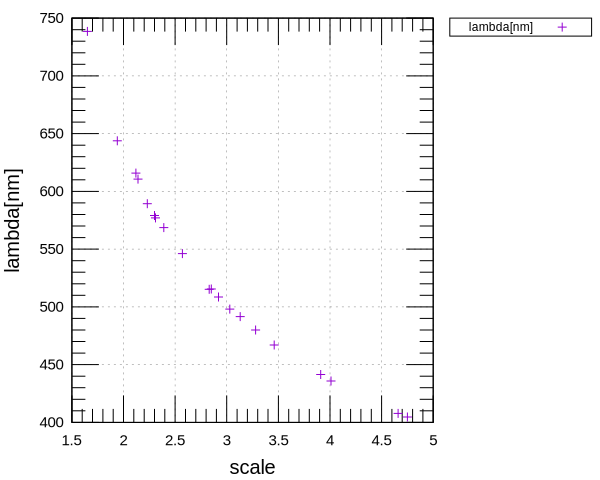

In [3]:
elem_dict = { 0 => 'Na', 1 => 'Hg', 2 => 'Cd' }
raw_data = <<DATA.to_df
scale, lambda[nm], element
2.23, 589.3, 0
2.30, 579.1, 1
2.31, 577.0, 1
2.57, 546.1, 1
4.01, 435.8, 1
1.94, 643.8, 2
2.92, 508.6, 2
1.65, 738.5, 2
2.14, 610.6, 2
2.85, 515.5, 2
3.28, 480.0, 2
3.46, 467.0, 2
3.91, 441.5, 2
2.12, 615.8, 0
2.39, 568.6, 0
3.03, 498.1, 0
2.83, 515.2, 0
3.13, 491.6, 1
4.66, 407.8, 1
4.75, 404.7, 1
DATA
variance_df = raw_data.map do |row|
  row.merge(
    'lambda_square_inverse[(nm)^2]' => 1.0/row['lambda[nm]']**2,
    'element' => elem_dict[row['element'].to_i]
  )
end.to_df
variance_df.plot(
  targets: [{x: 'scale', y: 'lambda[nm]' }]
)

In [17]:
variance_df.save_csv('csv/bunsan.csv')

"csv/bunsan.csv"

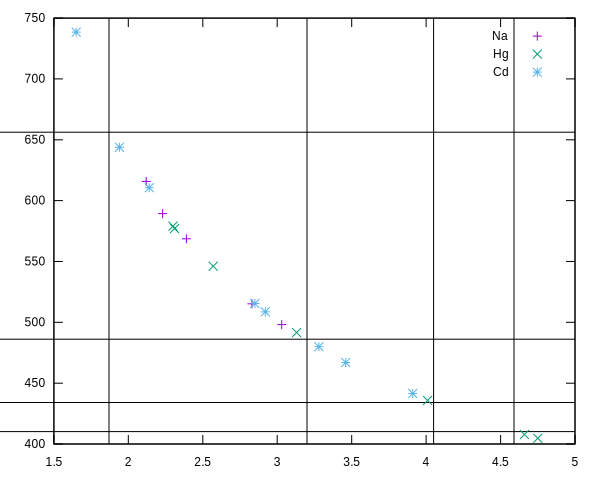

In [4]:
traces = variance_df.group_by { |row| row['element'] }.map do |element, rows|
  {xs: rows.to_df.by_col('scale'), ys: rows.to_df.by_col('lambda[nm]'), element: element }
end.map { |trace| [trace[:xs], trace[:ys], { title: trace[:element] }] }
Numo.noteplot do
  set 'arrow 1 from 1.87,400 to 1.87,750 nohead'
  set 'arrow 2 from 3.20,400 to 3.20,750 nohead'
  set 'arrow 3 from 4.05,400 to 4.05,750 nohead'
  set 'arrow 4 from 4.59,400 to 4.59,750 nohead'
  set 'arrow 5 from 1,434.1 to 5,434.1 nohead'
  set 'arrow 6 from 1,656.2 to 5,656.2 nohead'
  set 'arrow 7 from 1,486.1 to 5,486.1 nohead'
  set 'arrow 8 from 1,410.2 to 5,410.2 nohead'
  plot *traces
end

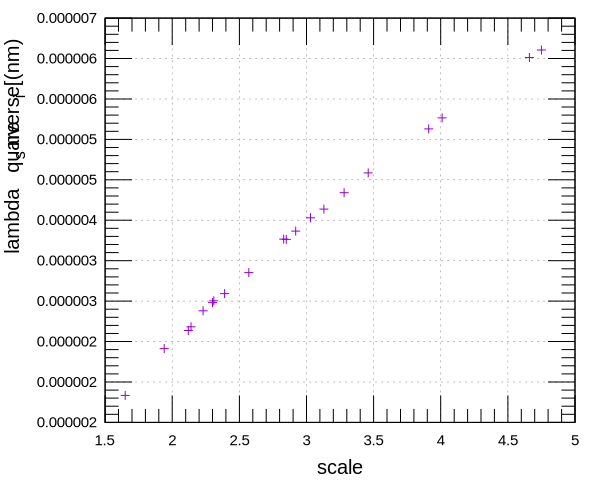

In [5]:
variance_df.plot(
  targets: [{x: 'scale', y: 'lambda_square_inverse[(nm)^2]'}],
  options: { nokey: '' }
)

In [6]:
l = 2
x0 = 0.25
y0 = 0
h_df = <<DATA.to_df
lambda[nm], scale, n
656.2, 1.87, 3
486.1, 3.20, 4
434.1, 4.05, 5
410.2, 4.59, 6
DATA
h_with_calc = h_df.map do |row|
  row.merge(
    'lambda_inverse' => 1/(row['lambda[nm]'] * 10**(-9)),
    'n_square_inverse' => 1/row['n']**2
  )
end.reset

lambda[nm],scale,n,lambda_inverse,n_square_inverse
656.2,1.87,3.0,1523925.6324291374,0.1111111111111111
486.1,3.2,4.0,2057189.8786257966,0.0625
434.1,4.05,5.0,2303616.6781847496,0.04
410.2,4.59,6.0,2437835.2023403216,0.027777777777777776


In [18]:
h_with_calc.save_csv('csv/h.csv')

"csv/h.csv"

2742405.860786482


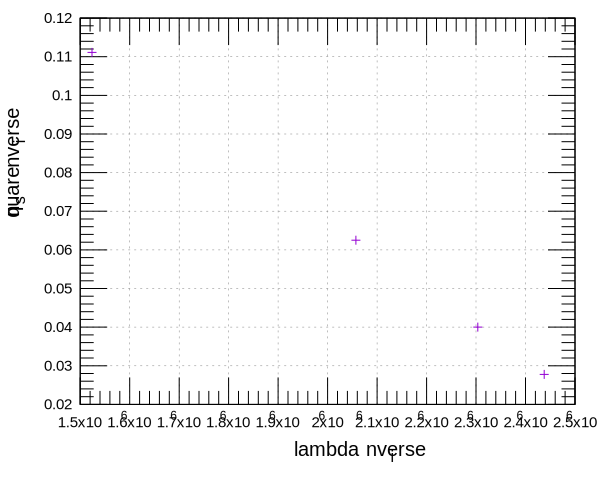

In [15]:
slope = h_with_calc.slope(x: 'n_square_inverse', y: 'lambda_inverse')
segment = p h_with_calc.segment(x: 'n_square_inverse', y: 'lambda_inverse')
h_with_calc.plot(
  targets: [
    {x: 'lambda_inverse', y: 'n_square_inverse'},
  ],
  options: {
    nokey: ''
  }
)

In [16]:
'%e' % h_with_calc.slope(x: 'n_square_inverse', y: 'lambda_inverse')

"-1.096594e+07"

In [12]:
h_with_calc.slope_error(x: 'n_square_inverse', y: 'lambda_inverse')

170.0577273954458

In [14]:
h_with_calc.segment(x: 'n_square_inverse', y: 'lambda_inverse') * 4

10969623.443145929